# Higher Diploma in Science in Computing - Data Analytics

- #### Principles of Data Analytics - Project Palmer Penguins

![ImgProgramming.jpeg](ImgProgramming.jpeg)

**by Rodrigo De Martino Ucedo**

*****

# Palmer Penguins

*****

![Penguins](lter_penguins.png)

### Imports
***

In [1]:
# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Graphic manipulation.

import seaborn as sns

# Numerical arrays.
import numpy as np

### Load Data

***

In [2]:
# Load the Penguins data set.
df = pd.read_csv("rawpalmerpenguinsdata.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Inspect Data

***

In [3]:
# The first 5 rows of the data set.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
# The last 5 rows of the data set.
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [5]:
# Informations of the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [6]:
# Inspect.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [29]:
# Descibe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [9]:
# Describe the object of the data set.
df.describe(include=[object])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [90]:
# Count the number of penguins of each specie per sex.
df.value_counts(['species', 'sex'])

species    sex   
Adelie     female    73
           male      73
Gentoo     male      61
           female    58
Chinstrap  female    34
           male      34
Name: count, dtype: int64

In [92]:
# Count the number of null.
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [26]:
# Describe the data set for sex in Chinstrap specie.
df[df['species']=='Chinstrap'].groupby('sex').describe().transpose()

sex                           female         male
bill_length_mm    count    34.000000    34.000000
                  mean     46.573529    51.094118
                  std       3.108669     1.564558
                  min      40.900000    48.500000
                  25%      45.425000    50.050000
                  50%      46.300000    50.950000
                  75%      47.375000    51.975000
                  max      58.000000    55.800000
bill_depth_mm     count    34.000000    34.000000
                  mean     17.588235    19.252941
                  std       0.781128     0.761273
                  min      16.400000    17.500000
                  25%      17.000000    18.800000
                  50%      17.650000    19.300000
                  75%      18.050000    19.800000
                  max      19.400000    20.800000
flipper_length_mm count    34.000000    34.000000
                  mean    191.735294   199.911765
                  std       5.754096     5.976558
                  min     178.000000   187.000000
                  25%     187.250000   196.000000
                  50%     192.000000   200.500000
                  75%     195.750000   203.000000
                  max     202.000000   212.000000
body_mass_g       count    34.000000    34.000000
                  mean   3527.205882  3938.970588
                  std     285.333912   362.137550
                  min    2700.000000  3250.000000
                  25%    3362.500000  3731.250000
                  50%    3550.000000  3950.000000
                  75%    3693.750000  4100.000000
                  max    4150.000000  4800.000000
year              count    34.000000    34.000000
                  mean   2007.970588  2007.970588
                  std       0.869876     0.869876
                  min    2007.000000  2007.000000
                  25%    2007.000000  2007.000000
                  50%    2008.000000  2008.000000
                  75%    2009.000000  2009.000000
                  max    2009.000000  2009.000000

In [22]:
# Describe the data set for sex in Gentoo specie.
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           female         male
bill_length_mm    count    58.000000    61.000000
                  mean     45.563793    49.473770
                  std       2.051247     2.720594
                  min      40.900000    44.400000
                  25%      43.850000    48.100000
                  50%      45.500000    49.500000
                  75%      46.875000    50.500000
                  max      50.500000    59.600000
bill_depth_mm     count    58.000000    61.000000
                  mean     14.237931    15.718033
                  std       0.540249     0.741060
                  min      13.100000    14.100000
                  25%      13.800000    15.200000
                  50%      14.250000    15.700000
                  75%      14.600000    16.100000
                  max      15.500000    17.300000
flipper_length_mm count    58.000000    61.000000
                  mean    212.706897   221.540984
                  std       3.897856     5.673252
                  min     203.000000   208.000000
                  25%     210.000000   218.000000
                  50%     212.000000   221.000000
                  75%     215.000000   225.000000
                  max     222.000000   231.000000
body_mass_g       count    58.000000    61.000000
                  mean   4679.741379  5484.836066
                  std     281.578294   313.158596
                  min    3950.000000  4750.000000
                  25%    4462.500000  5300.000000
                  50%    4700.000000  5500.000000
                  75%    4875.000000  5700.000000
                  max    5200.000000  6300.000000
year              count    58.000000    61.000000
                  mean   2008.068966  2008.065574
                  std       0.791669     0.793071
                  min    2007.000000  2007.000000
                  25%    2007.000000  2007.000000
                  50%    2008.000000  2008.000000
                  75%    2009.000000  2009.000000
                  max    2009.000000  2009.000000

In [23]:
# Describe the data set for sex in Adelie specie.
df[df['species']=='Adelie'].groupby('sex').describe().transpose()

sex                           female         male
bill_length_mm    count    73.000000    73.000000
                  mean     37.257534    40.390411
                  std       2.028883     2.277131
                  min      32.100000    34.600000
                  25%      35.900000    39.000000
                  50%      37.000000    40.600000
                  75%      38.800000    41.500000
                  max      42.200000    46.000000
bill_depth_mm     count    73.000000    73.000000
                  mean     17.621918    19.072603
                  std       0.942993     1.018886
                  min      15.500000    17.000000
                  25%      17.000000    18.500000
                  50%      17.600000    18.900000
                  75%      18.300000    19.600000
                  max      20.700000    21.500000
flipper_length_mm count    73.000000    73.000000
                  mean    187.794521   192.410959
                  std       5.595035     6.599317
                  min     172.000000   178.000000
                  25%     185.000000   189.000000
                  50%     188.000000   193.000000
                  75%     191.000000   197.000000
                  max     202.000000   210.000000
body_mass_g       count    73.000000    73.000000
                  mean   3368.835616  4043.493151
                  std     269.380102   346.811553
                  min    2850.000000  3325.000000
                  25%    3175.000000  3800.000000
                  50%    3400.000000  4000.000000
                  75%    3550.000000  4300.000000
                  max    3900.000000  4775.000000
year              count    73.000000    73.000000
                  mean   2008.054795  2008.054795
                  std       0.814630     0.814630
                  min    2007.000000  2007.000000
                  25%    2007.000000  2007.000000
                  50%    2008.000000  2008.000000
                  75%    2009.000000  2009.000000
                  max    2009.000000  2009.000000

In [99]:
# Count the number of penguins of each island per sex.
df.value_counts(['island', 'sex'])

island     sex   
Biscoe     male      83
           female    80
Dream      male      62
           female    61
Torgersen  female    24
           male      23
Name: count, dtype: int64

In [101]:
# Correlation of the data set.
df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,0.054545
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.060354
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.169675
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.042209
year,0.054545,-0.060354,0.169675,0.042209,1.000000


### Data Visualisation
***

<BarContainer object of 344 artists>

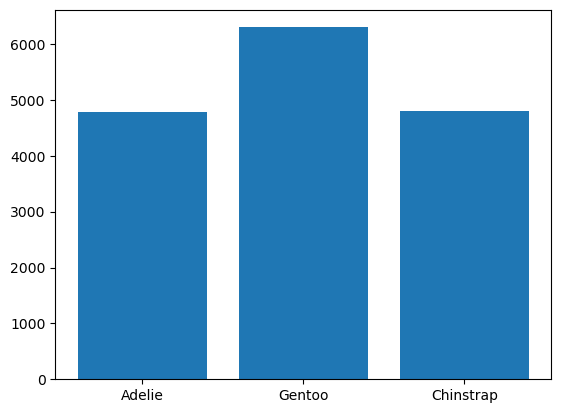

In [ ]:
sps1=df['species']
bmass=df['body_mass_g']
plt.bar(sps1, bmass)

<Axes: >

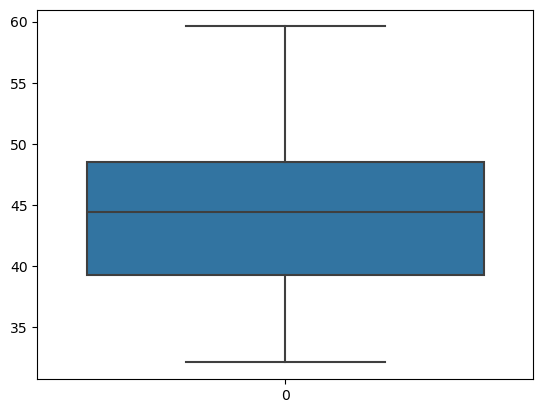

In [ ]:
sns.boxplot(df['bill_length_mm'])

mean: species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64
median: species
Adelie       3700.0
Chinstrap    3700.0
Gentoo       5000.0
Name: body_mass_g, dtype: float64


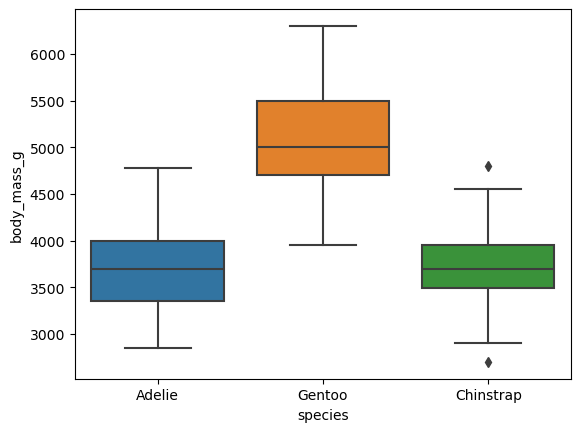

In [ ]:
fig1 = sns.boxplot(x="species", y="body_mass_g", data=df)
print("mean:", df.groupby("species")["body_mass_g"].mean())
print("median:", df.groupby("species")["body_mass_g"].median())

Text(0, 0.5, 'Body Mass')

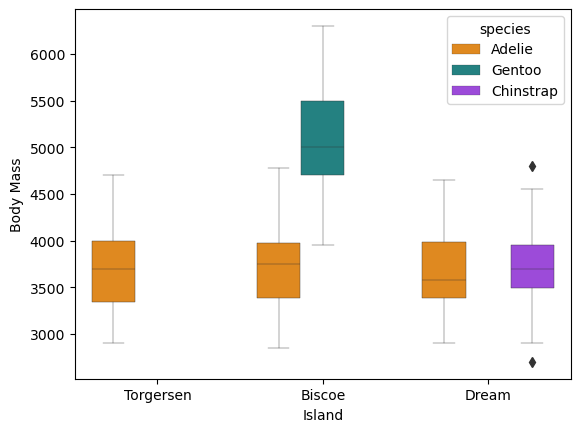

In [ ]:
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = df,
            palette=['#FF8C00','#159090','#A034F0'],
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

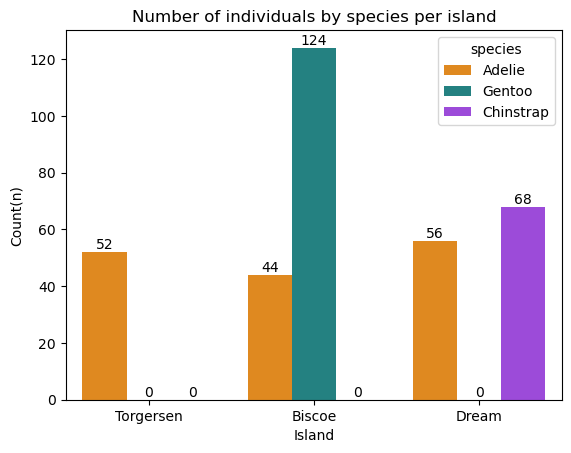

In [56]:
ax = sns.countplot(x='island', hue='species', data=df, palette=['#FF8C00','#159090','#A034F0'])
plt.title('Number of individuals by species per island')
plt.xlabel('Island')
plt.ylabel('Count(n)')
for container in ax.containers:
    ax.bar_label(container)

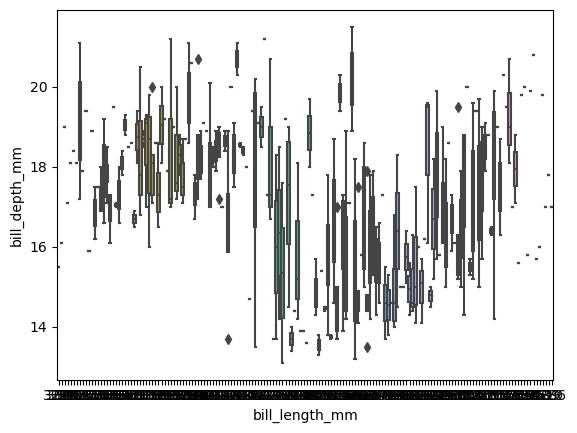

In [ ]:
fig1 = sns.boxplot(x="bill_length_mm", y="bill_depth_mm", data=df)


*****
#### End
last commit on 31/04/2024